# Happiness Project
In this CoLab Notebook I load a data set containing Happiness Scores by country and then explore the data. The purpose of this project is to demonstrate a basic level of proficiency in Python, data interpretation, and critical thinking through exploratory data analysis.

The data is a combination of two different Kaggle data sets (Happiness report from Gallop World Poll and a COVID report) that were combined for use in an introductory statistics course at the Colorado School of Mines. A copy of this data set is in my GitHub account.

**Let's begin by importing several common libraries and our data set.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
urlHappiness = 'https://raw.githubusercontent.com/j-philtron/Projects/81c6c4ff0f71934ab038746924c29f935e5bc452/WorldHappiness.csv'
happyData = pd.read_csv(urlHappiness)

**First, we'll determine what type and how much data we've just loaded.**

In [4]:
happyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     148 non-null    object 
 1   Region                   148 non-null    object 
 2   HappinessScore           148 non-null    float64
 3   Population2019           147 non-null    float64
 4   CovidDeaths2020          146 non-null    float64
 5   MedianAge                146 non-null    float64
 6   FemaleGovBoss            148 non-null    object 
 7   InstitutionalTrust       148 non-null    float64
 8   ExcessDeaths             62 non-null     float64
 9   LogGDP                   148 non-null    float64
 10  SocialSupport            148 non-null    float64
 11  HealthyLifeExpectancy    148 non-null    float64
 12  Freedom                  148 non-null    float64
 13  PerceptionsOfCorruption  148 non-null    float64
 14  Island                   1

In [5]:
happyData.head()

,Name,Region,HappinessScore,Population2019,CovidDeaths2020,MedianAge,FemaleGovBoss,InstitutionalTrust,ExcessDeaths,LogGDP,SocialSupport,HealthyLifeExpectancy,Freedom,PerceptionsOfCorruption,Island
0,United States,North America and ANZ,6.951,328.239523,104.451,38.3,No,0.250,179.22,11.023,0.920,68.200,0.837,0.698,No
1,Egypt,Middle East and North Africa,4.283,100.388073,7.457,25.3,No,0.446,NaN,9.367,0.750,61.998,0.749,0.795,No
2,Morocco,Middle East and North Africa,4.918,36.471769,20.016,29.6,No,0.397,NaN,8.903,0.560,66.208,0.774,0.801,No
3,Lebanon,Middle East and North Africa,4.584,6.855713,21.508,31.1,No,0.107,NaN,9.626,0.848,67.355,0.525,0.898,No
4,Saudi Arabia,Middle East and North Africa,6.494,34.268528,17.875,31.9,No,0.651,NaN,10.743,0.891,66.603,0.877,0.684,No


**There are 148 countries in the data set, and 14 columns of information pertaining to each country. The information is largely numeric. Several columns have missing data.**

**Let's look at summary statistics for the columns with numeric data.**

In [6]:
happyData.describe()

,HappinessScore,Population2019,CovidDeaths2020,MedianAge,InstitutionalTrust,ExcessDeaths,LogGDP,SocialSupport,HealthyLifeExpectancy,Freedom,PerceptionsOfCorruption
count,148.000000,147.000000,146.000000,146.000000,148.000000,62.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,5.541115,50.237672,32.990979,31.308219,0.309709,111.927419,9.434689,0.815047,65.088473,0.792574,0.727581
std,1.072792,165.107008,39.385470,9.335476,0.170190,82.399817,1.162138,0.115220,6.683047,0.113085,0.179828
min,2.523000,0.361313,0.000000,15.100000,0.046000,-26.468000,6.635000,0.463000,48.478000,0.382000,0.082000
25%,4.853500,5.197729,1.800250,23.225000,0.180750,44.580500,8.540250,0.749000,59.922000,0.718750,0.666250
50%,5.535000,11.513100,14.145000,30.850000,0.285500,105.636000,9.573000,0.832000,66.651500,0.805000,0.784000
75%,6.268500,37.030515,52.568250,40.000000,0.412000,172.398250,10.436000,0.905250,69.613000,0.877500,0.845500
max,7.842000,1397.715000,168.496000,48.200000,0.906000,323.476000,11.647000,0.983000,76.953000,0.970000,0.939000


**The columns don't have units noted, but we can infer most of them. For example, the population column uses units of millions of people, the covid deaths column uses units of thousands of people, and the median age column uses units of years.
The Happiness Score ranges from a minimum of 2.52 and to a maximum of 7.84. One important (and obvious) question we can ask is: What makes people happy? Let's explore the data set and try to determine what attributes are correlated with higher happiness scores.**

**What are the 5 countries with the highest and lowest happiness scores?**

In [7]:
happyData.nlargest(5,'HappinessScore')

,Name,Region,HappinessScore,Population2019,CovidDeaths2020,MedianAge,FemaleGovBoss,InstitutionalTrust,ExcessDeaths,LogGDP,SocialSupport,HealthyLifeExpectancy,Freedom,PerceptionsOfCorruption,Island
100,Finland,Western Europe,7.842,5.520314,10.125,42.8,Yes,0.550,31.510,10.775,0.954,72.0,0.949,0.186,No
23,Denmark,Western Europe,7.620,5.818553,22.409,42.3,Yes,0.572,25.534,10.933,0.954,72.7,0.946,0.179,No
136,Switzerland,Western Europe,7.571,8.574832,88.334,43.1,No,0.660,116.680,11.117,0.942,74.4,0.919,0.292,No
106,Iceland,Western Europe,7.554,0.361313,8.498,37.3,Yes,0.325,21.445,10.878,0.983,73.0,0.955,0.673,Yes
13,Netherlands,Western Europe,7.464,17.332850,67.260,43.2,No,0.522,114.468,10.932,0.942,72.4,0.913,0.338,No


In [8]:
happyData.nsmallest(5,'HappinessScore')

,Name,Region,HappinessScore,Population2019,CovidDeaths2020,MedianAge,FemaleGovBoss,InstitutionalTrust,ExcessDeaths,LogGDP,SocialSupport,HealthyLifeExpectancy,Freedom,PerceptionsOfCorruption,Island
65,Afghanistan,South Asia,2.523,38.041754,5.628,18.6,No,0.046,NaN,7.695,0.463,52.493,0.382,0.924,No
76,Zimbabwe,Sub-Saharan Africa,3.145,14.645468,2.442,19.6,No,0.287,NaN,7.943,0.750,56.201,0.677,0.821,No
60,Rwanda,Sub-Saharan Africa,3.415,12.626950,0.710,20.3,No,0.906,NaN,7.676,0.552,61.400,0.897,0.167,No
54,Botswana,Sub-Saharan Africa,3.467,2.303697,1.786,25.8,No,0.435,NaN,9.782,0.784,59.269,0.824,0.801,No
113,Lesotho,Sub-Saharan Africa,3.512,2.125268,2.381,24.0,No,0.279,NaN,7.926,0.787,48.700,0.715,0.915,No


**It is interesting that the highest 5 scores are all countries in Western Europe, while 4 of the lowest 5 scores are in Sub-Saharan Africa. We can hypothesize that happiness might be correlated by region. To explore this we can plot happiness score by region. A boxplot is a useful visualization tool when we have categories containing numeric data.**

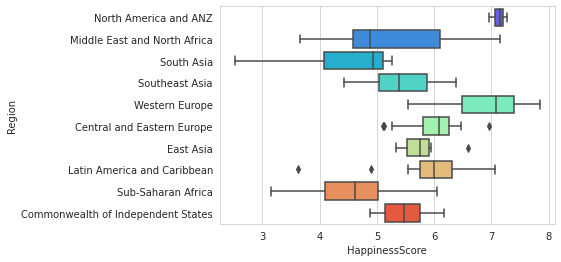

In [9]:
sns.set_style('whitegrid')
sns.boxplot(y='Region', x='HappinessScore', data=happyData, palette='rainbow')

**North America and ANZ and Western Europe have the highest mean happiness scores,and are therefore associated with higher happiness. Some countries in South Asia and Sub-Saharan Africa have the lowest scores, as we previously saw when looking at the 5 countries with the lowest score. A third region with a low mean score is the Middle East and North Africa region, although this region contains countries with low and high scores. The larger varience in happiness score for this region could indicate that the countries within this region are less similar to each other than countries in other regions.**

**There are a lot of columns with numerical data. We can make a correlation heatmap to see which are highly correlated.**

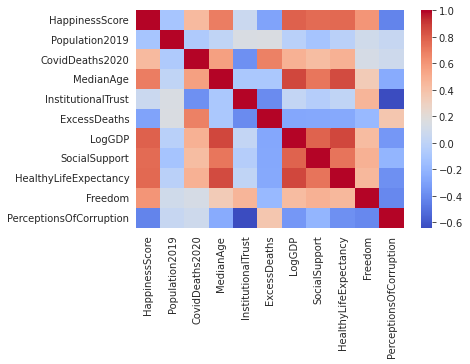

In [10]:
sns.heatmap(happyData.corr(),cmap='coolwarm')

**The diagonal shows a correlation of 1, since a variable's correlation with itself is perfect. The colorscale ranges from 1.0 to -0.6. Negative numbers indicate that those attributes are inversely correlated (when one goes up the other goes down).**

**There are several variables that appear to be associated with higher happiness. Let's make a clustermap and let Seaborn automatically group them together.**

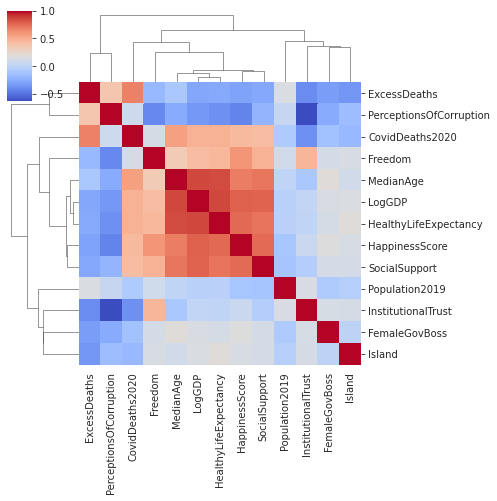

In [25]:
sns.clustermap(happyData.corr(), cmap='coolwarm', figsize=(7,7))

**The attributes MedianAge, LogGDP, HealthyLifeExpectancy, and SocialSupport all show strong correlation with HappinessScore and each other. This suggests that in general, longer life, higher monetary resources, and a higher level of social support are all associated with higher happiness.**

**PerceptionsOfCorruption is negatively associated with HappinessScore, suggesting that if a country's government is perceived as corrupt then its citizens are less likely to rate themselves as very happy.**

**There is a strong negative correlation between PerceptionsOfCorruption and InstitutionalTrust, meaning that higher perceptions of corruption are associated with lower values of institutional trust. It makes intuitive sense that citizens would not be likely to trust their government if they felt it was corrupt.**

**Let's look at the variables that were highly correlated with HappinessScore in a pairplot. A pairplot is a useful way to see both distributions of single variables as well as the relationships between different variables.**

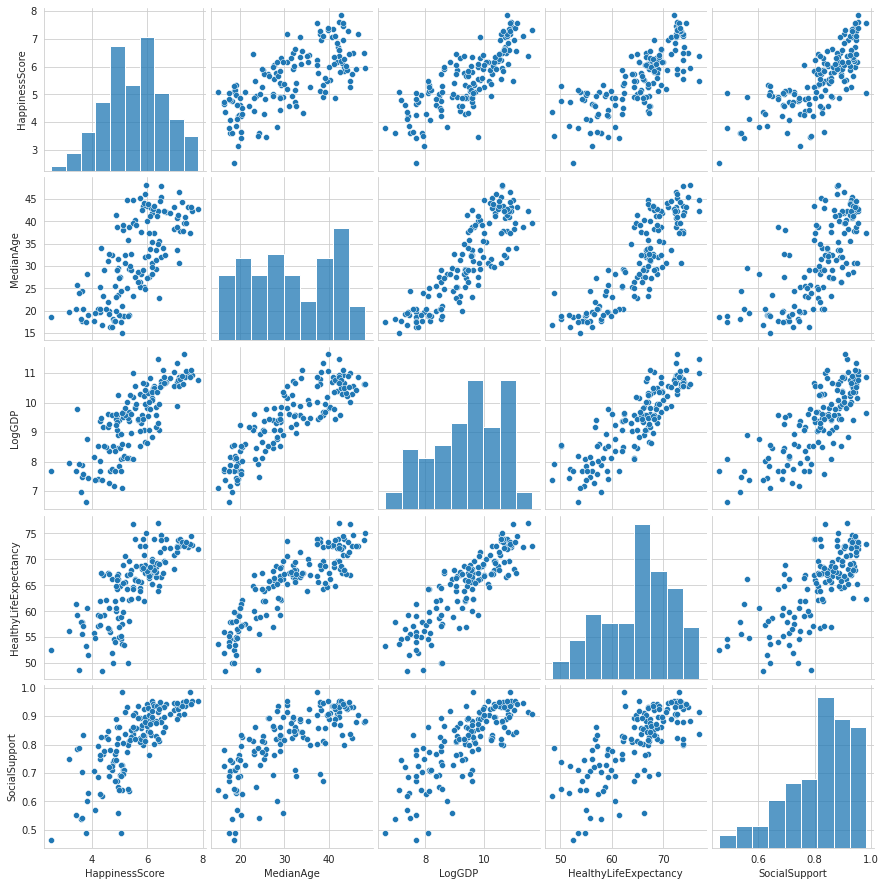

In [28]:
sns.pairplot(happyData[['HappinessScore','MedianAge','LogGDP','HealthyLifeExpectancy','SocialSupport']])

**The observed trend in the scatterplots (data points along a line) suggests that a linear regression model would work well to predict the value of one variable based on the value of another variable. A multiple linear regression model could could be used to apply information from several variables in order to predict happiness score.**

**The observation that multiple variables are strongly correlated with happiness score but also strongly correlated with each other is an example of multiple collinearity. This can make the estimates unstable (lead to increased error) and could obscure which variables are most effective in predicting happiness score.**

**Also, we observe some curvature in the relationship of the HealthyLifeExpectancy and SocialSupport variables with happiness score. It would likely prove useful to include higher order terms for these variables in a regression model.**

**Two of the columns that we haven't yet examined are FemaleGovBoss and Island. These are  non-numerical columns that simply say 'yes' or 'no.' We will convert the data in these columns into ones and zeros, which is generally easier to work with than text strings. We will define a function called 'changeYesNoToNumber' that we will apply to these two columns of data.**

In [13]:
def changeYesNoToNumber(txt):
    """
    This function accepts an input text string of 'Yes' or 'No' and outputs a 1 or 0.
    """
    if txt == 'Yes': # Input is 'Yes', so return a one
        return 1 
    else: # Input is 'No', so return a zero
        return 0

In [14]:
happyData['Island'] = happyData['Island'].apply(changeYesNoToNumber)

In [15]:
happyData['FemaleGovBoss'] = happyData['FemaleGovBoss'].apply(changeYesNoToNumber)

**Let's plot this data.**

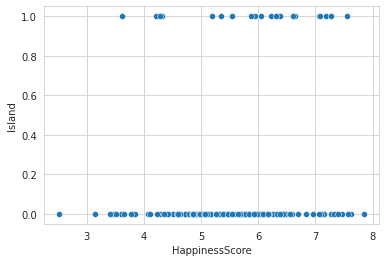

In [16]:
sns.scatterplot(x=happyData['HappinessScore'], y=happyData['Island'])

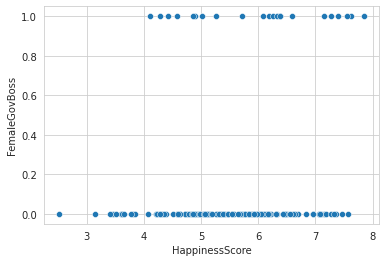

In [17]:
sns.scatterplot(x=happyData['HappinessScore'], y=happyData['FemaleGovBoss'])

**Logistic regression would be an appropriate method to make predictions on a binary outcome (e.g., happiness score used to predict presence of a female leader or not). It can also be used in the opposite way, where presence of a female leader could be used to predict happiness score. Note that by itself this binary variable isn't a 'good' predictor of the continuous variable happiness score! However, it could add utility in tandem with other variables for predicting happiness score.**

**It is hard to interpret the scatter plots above because they have overlapping data points. A boxplot could more easily show the difference in happiness scores (continuous variable) for countries with or without female leaders (a binary variable).**

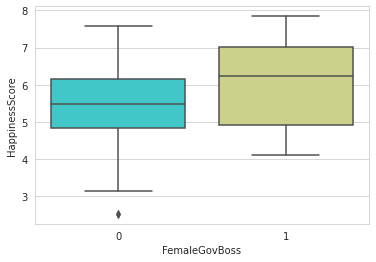

In [18]:
sns.boxplot(x='FemaleGovBoss', y='HappinessScore', data=happyData, palette='rainbow')

**The boxplot shows that the mean happiness score is higher when the country has a female leader. However, there is significant overlap between the two classes. A kernel density estimation (kde) plot is a good way to view the distribution of data, and I feel it is better suited to view this data.**

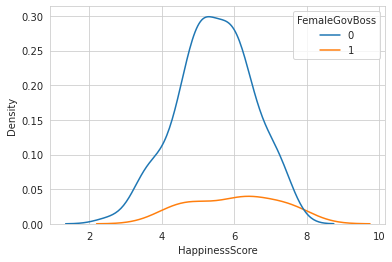

In [19]:
sns.kdeplot(data=happyData, x='HappinessScore', hue='FemaleGovBoss')

**Although the mean is different, the kde plot shows that there is a large overlap between the two classes. Also, we can clearly see that there are far fewer countries that have a female leader than those that have male leaders.**

In [20]:
pctFemaleLeaders = round( sum(happyData['FemaleGovBoss']) / len(happyData['FemaleGovBoss']) *100)
print('The percentage of countries with female leaders in this data set is {}%.'.format(pctFemaleLeaders))

The percentage of countries with female leaders in this data set is 15%.


**To this point we've taken an approach where we've been focused on the relationship between single variables at a time. Let's now take a look at how the effects of one variable might depend on the value of a third (multivariate thinking). To do this we can add color to a scatterplot.**

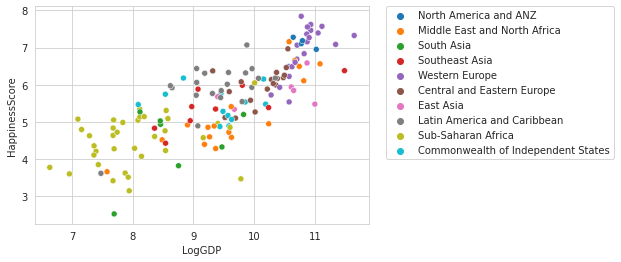

In [36]:
sns.scatterplot(data=happyData, x='LogGDP', y='HappinessScore', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

**HappinessScore and LogGDP appear to be grouped by region. Western Europe has the highest LogGDP and HappinessScore while Sub-Saharan Africa has the lowest values of those two variables. Two of the regions that show less clustering are the Middle East and North Africa and Southeast Asia**

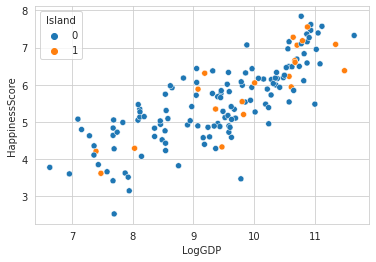

In [41]:
sns.scatterplot(data=happyData, x='LogGDP', y='HappinessScore', hue='Island')

**Whether a country is an island isn't associated with LogGDP or HappinessScore.**

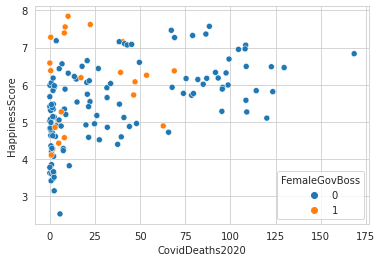

In [43]:
sns.scatterplot(data=happyData, x='CovidDeaths2020', y='HappinessScore', hue='FemaleGovBoss')

**Having a female leader is associated with higher happiness and a lower number of deaths from COVID in 2020.**

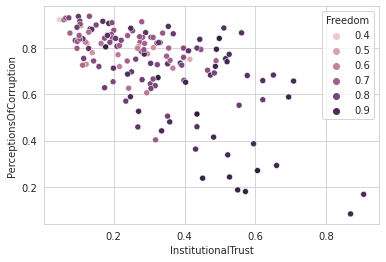

In [44]:
sns.scatterplot(data=happyData, x='InstitutionalTrust', y='PerceptionsOfCorruption', hue='Freedom')

**Higher Fredom scores are associated with higher values of institutional trust and lower values of perceived corruption.**

**This concludes our exploratory data analysis. In this notebook, we have loaded in a data set containing attributes of countries from around the world, including a happiness score. We have explored the structure and content of the data and viewed it in several different ways. We have made observations about attributes that are correlated to happiness, and also suggested models which could prove useful to explain the relationship between citizen happiness and other variables.**